# Pymaceuticals Inc.
---

### Analysis

- Looking at our Summary statistics table, we can see that Capomulin and Ramicane had the lowest mean tumor size/volume and additionally also had comparatively low variance and standard deviations. In short, this means that these two medications were the most effective in reducing tumor size and were also able to do so consistently as demonstrated by the low variance and standard deviaton. This is good news for our company Pymaceuticals Inc. as our drug of interest, Capomulin was one of the top two drugs in terms of overall performance in tumor size reduction and consistent effectiveness at reducing tumor size. I feel there may be a slight bias in this data because when looking at our bar plots to compare the frequency of which drugs were used in the drug regimens for a mouse, there is a significantly higher number of both Capomulin and Ramicane. Our gender distribution doesn't tell us anything particularly interesting, just that there is a pretty equal distribution of male and female mice used in our study. Looking at our box plots we can see that Infubinol was the only medicine with any outliers, but more importantly, we see that Capomulin and Ramicane both had significantly lower final tumor volumes which corroborates our first observation that those two medicines were most effective at reducing tumor size. Looking at our line plot for the tumor size of a mouse treated with Capomulin, we can observe that the medicine seems to have an impact on reducing tumor size after 20 days of use, with an increase in effictivity after 30 days of use. However, it is important to note, that there is an uptick in tumor
size at around 35 days which should be noted when determining how long to perscribe it for should it be approved for humans. Lastly, there is a positive correlation between the tumor volume and weight of the mouse, the larger the tumor size, the larger the mouse. This can simply be explained by considering that the larger the tumor, the more it weighs, hence the overall weight of the mouse with a larger tumor would be more. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_df = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_count = len(complete_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mask = complete_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice = complete_df[duplicate_mask]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#used Xpert 
# Identify duplicate rows based on Mouse ID and Timepoint
duplicate_rows = complete_df[complete_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Filter the DataFrame to show all rows associated with the duplicate Mouse IDs
duplicate_mouse_data = complete_df[complete_df['Mouse ID'].isin(duplicate_rows['Mouse ID'])]

# Display the data associated with duplicate Mouse IDs
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = complete_df[complete_df["Mouse ID"].isin(duplicate_mice)==False]

# Display the updated number of unique mice IDs
cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [7]:

# Checking the number of mice in the clean DataFrame.
unique_mice_count = len(cleaned_data['Mouse ID'].unique())

unique_mice_count


248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
std_dev = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
variance = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [15]:
summary_table_simple = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": median,
    "Var Tumor Volume": variance,
    "Std Tumor Volume": std_dev,
    "SEM Tumor Volume": sem,
})
summary_table_simple

,Mean Tumor Volume,Median Tumor Volume,Var Tumor Volume,Std Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

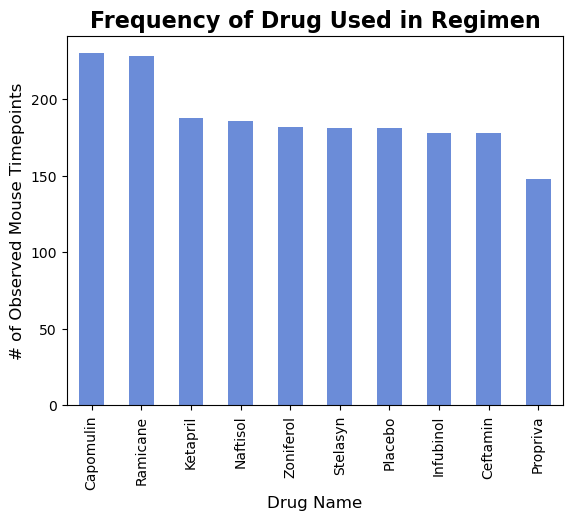

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = cleaned_data["Drug Regimen"].value_counts()
counts.plot(kind="bar", color = "#6B8CD8" )
plt.xlabel("Drug Name", fontsize=12)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12)
plt.title("Frequency of Drug Used in Regimen", fontweight="bold", fontsize=16,)
plt.show()

In [96]:
counts.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

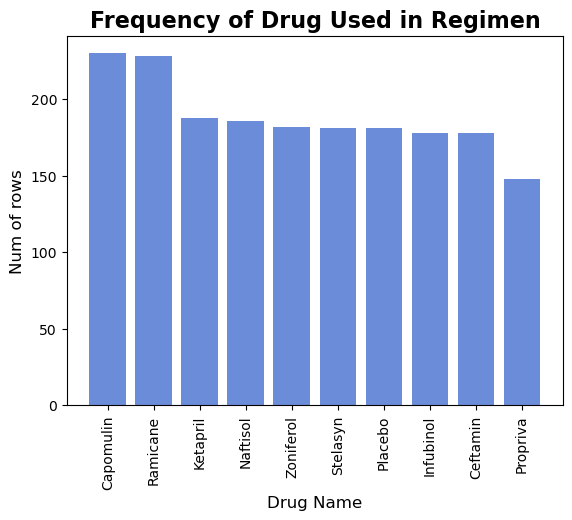

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index, counts.values, color = "#6B8CD8")
plt.xticks(rotation=90)
plt.xlabel("Drug Name", fontsize=12)
plt.ylabel("Num of rows", fontsize=12)
plt.title("Frequency of Drug Used in Regimen", fontweight="bold", fontsize=16,)
plt.show()

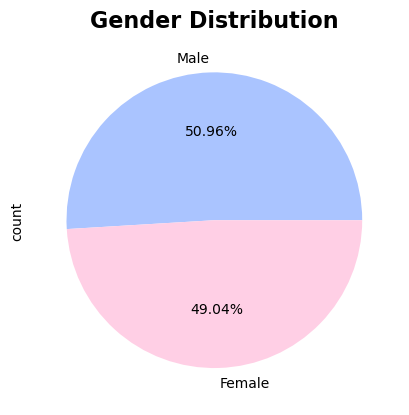

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["#AAC4FF", "#FFCFE5"]


gender_count = cleaned_data["Sex"].value_counts()
gender_count.plot(kind="pie", autopct='%1.2f%%', labels=labels, colors = colors)
plt.title("Gender Distribution", fontweight="bold", fontsize=16,)
plt.show()

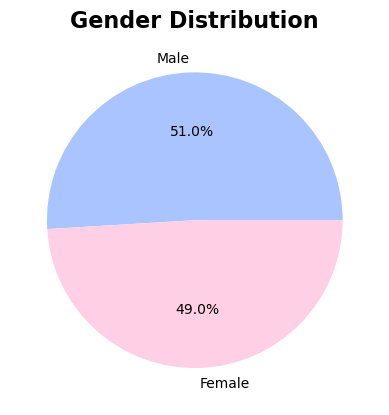

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["#AAC4FF", "#FFCFE5"]
plt.pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%', colors = colors)
plt.title("Gender Distribution", fontweight="bold", fontsize=16,)
plt.show()

## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = cleaned_data.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(cleaned_data, on=["Mouse ID", "Timepoint"], how = "left")
merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [110]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (iqr*1.5)
    upper_bound = upperq + (iqr*1.5)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outlier: {outliers}")

Capomulin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


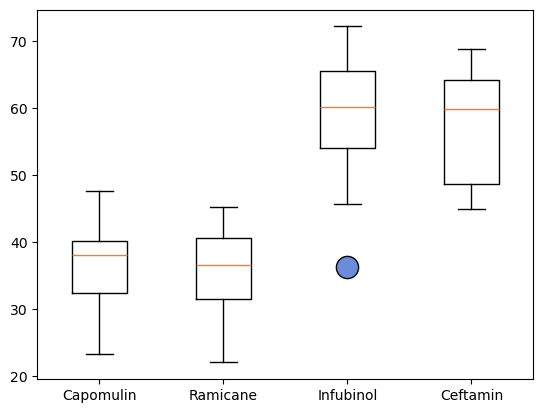

In [116]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_outlier = dict(markerfacecolor="#6B8CD8", markersize=16)
plt.boxplot(tumor_vol,labels=treatment_list,flierprops=orange_outlier)
plt.show()

## Line and Scatter Plots

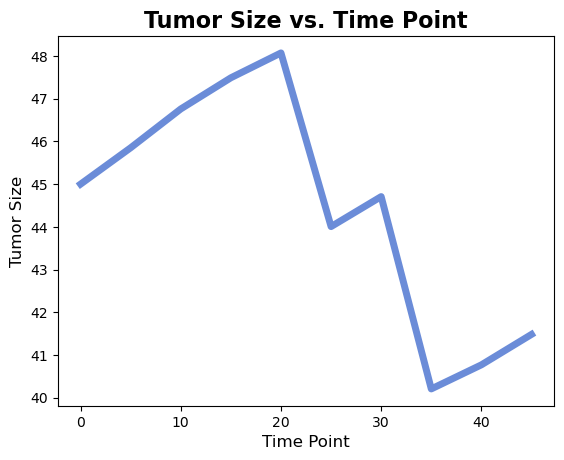

In [135]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table["Mouse ID"]=="l509"]
plt.plot(mousedata["Timepoint"],mousedata["Tumor Volume (mm3)"], color = "#6B8CD8", linewidth = 5)
plt.title("Tumor Size vs. Time Point", fontweight = "bold", fontsize = 16)
plt.xlabel("Time Point", fontsize = 12)
plt.ylabel("Tumor Size", fontsize = 12)
plt.show()

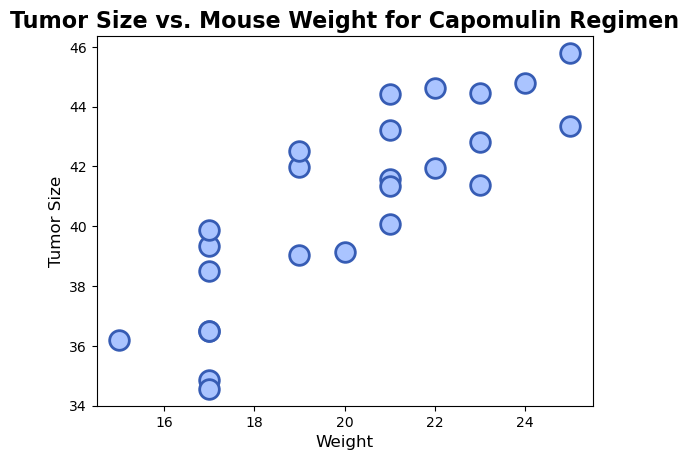

In [136]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_table = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
cap_avg = cap_table.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"], facecolor="#AAC4FF", edgecolor="#365CB4", s=200, linewidths = 2)
plt.xlabel("Weight", fontsize = 12)
plt.ylabel("Tumor Size", fontsize = 12)
plt.title("Tumor Size vs. Mouse Weight for Capomulin Regimen", fontsize = 16, fontweight = "bold" )
plt.show()


## Correlation and Regression

y =f(x)    
y = angle * x + intercept (+- error)

In [69]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(st.pearsonr(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])[0],2)
print(f"Pearsonr correlation: {corr}")
model =st.linregress(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
slope = model[0]
intercept = model[1]
y_values = cap_avg["Weight (g)"] * slope + intercept

Pearsonr correlation: 0.84


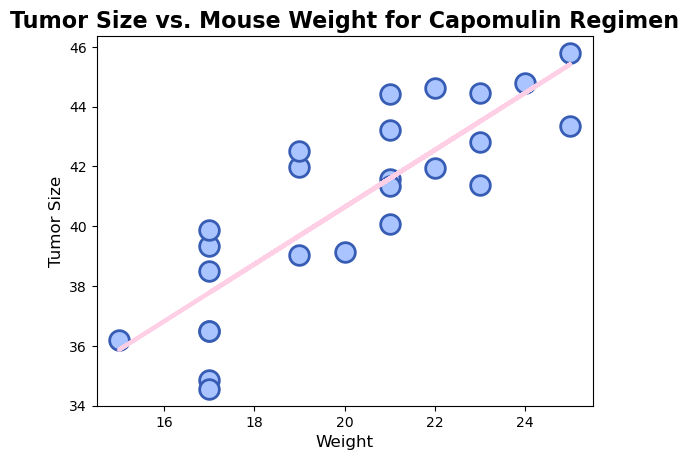

In [137]:
plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"], facecolor="#AAC4FF", edgecolor="#365CB4", s=200, linewidths = 2)
plt.plot(cap_avg["Weight (g)"], y_values,color="#FFCFE5", linewidth = 3,)
plt.xlabel("Weight", fontsize = 12)
plt.ylabel("Tumor Size", fontsize = 12)
plt.title("Tumor Size vs. Mouse Weight for Capomulin Regimen", fontsize = 16, fontweight = "bold" )
plt.show()